In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import numpy as np
from sklearn.preprocessing import LabelEncoder
import hdbscan
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [5]:
X = pd.read_csv("../data/cleaned_data.csv", low_memory = False)

# Data Scaling

In [6]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# HDBSCAN Test

In [7]:
hdb = hdbscan.HDBSCAN()

In [8]:
cluster_labels = hdb.fit_predict(scaled_X)


# PCA Vis

In [17]:
pca = PCA(n_components=3)
pca.fit(scaled_X)
X_pca = pca.transform(scaled_X)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


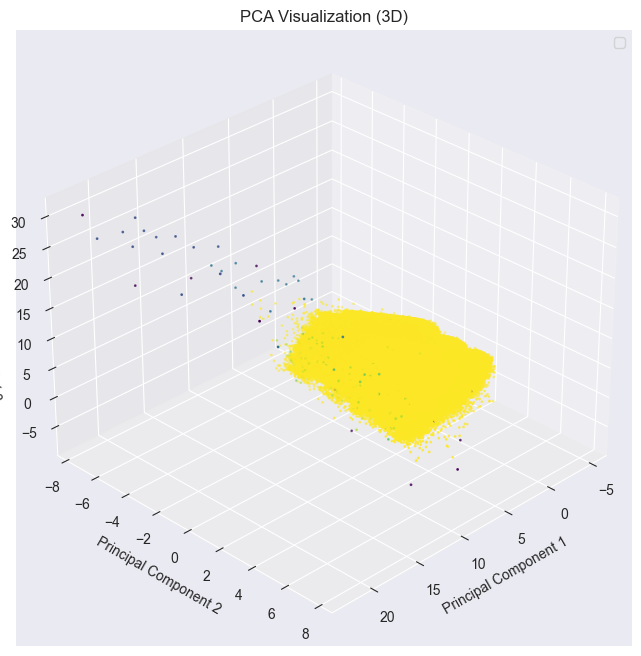

In [26]:


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', s= 1) # Assuming target_labels is your target variable
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# Customize the viewing angle
ax.view_init(elev=30, azim=45)  # Change the elevation (elev) and azimuth (azim) angles as desired

plt.show()


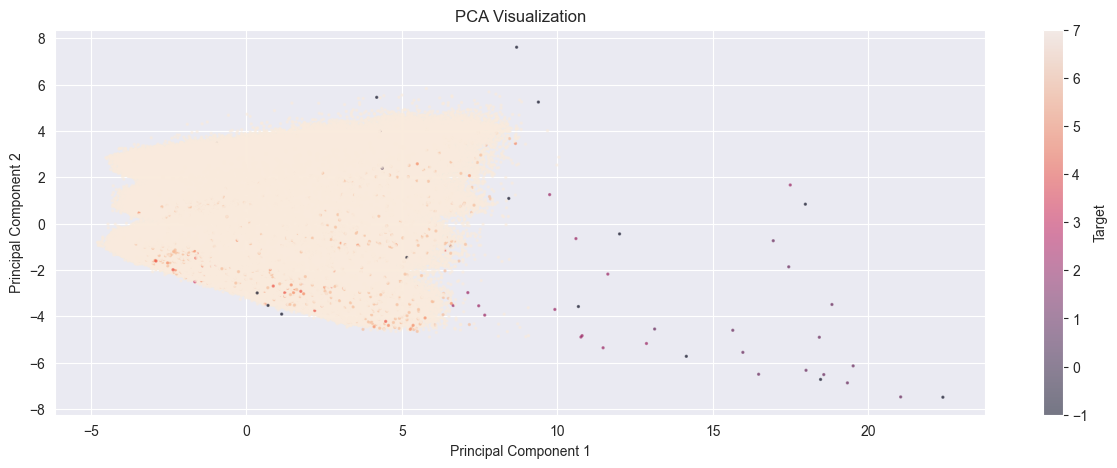

In [29]:
plt.figure(figsize=(15, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=2, alpha=0.5) # Assuming target_labels is your target variable
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()


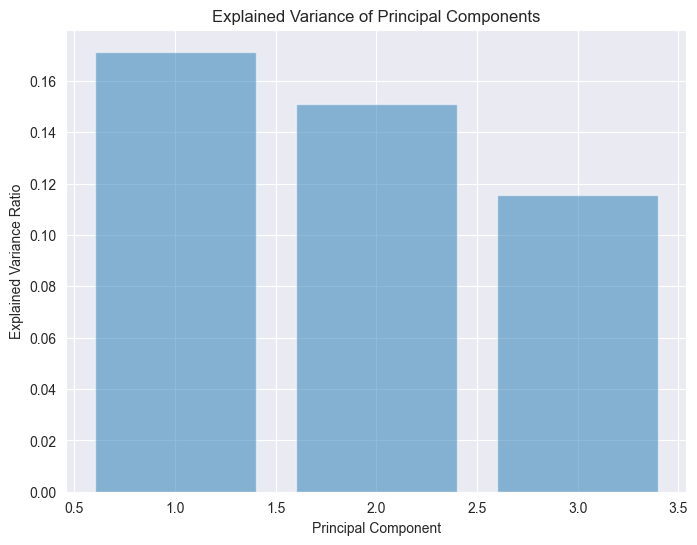

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


array([7, 7, 7, ..., 7, 7, 7], dtype=int64)